In [70]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from src.PLS.utils import sims_graphs

In [71]:
Typ = ["simple","simple_I0","meta"][2]
siz = ["10","100","1000"][0]
seed =1912
sim_scen = ["","c1","c2","c3"][0]
beta_controls = np.arange(0,1.1,0.1)
gamma_additives  = np.arange(0,10,1)
thinning_intensities = np.arange(0,0.55,0.05)
thinning_frequencies = np.arange(0.5,3.0,0.5)

In [72]:
#import distributions
distro = np.genfromtxt(f"../../Data/R0_3/Sims_SIR/Sampled_distros/Distro_{Typ}_{siz}.csv",delimiter=",")[0:6]

In [73]:
print(distro)

[3.84445484 5.6838402  5.88680049 5.23721426 7.58917697 2.56748124]


In [74]:
#for i in range(len(beta_controls)):
output_dictionary = sims_graphs(distro,Typ,siz,seed,sim_scen,beta_controls[:])

In [75]:
if Typ != "meta":
    fig, ax0 = plt.subplots(figsize = (18,12),nrows=2, ncols=3)
    ax0 = ax0.flatten()
    times = np.arange(0,max(output_dictionary["T"]),0.01)
    for i in range(len(output_dictionary["Runs"])):
        ax0[i].plot(times,np.array(output_dictionary["Runs"][i])[0:len(times),1], color = "orange", alpha = 1)
        ax0[i].plot(times,np.array(output_dictionary["Runs"][i])[0:len(times),0], color = "b", alpha = 1)
        ax0[i].plot(times,np.array(output_dictionary["Runs"][i])[0:len(times),2], color = "g", alpha = 1)
        ax0[i].set_xlabel("Time")
    fig.show

C:\Users\ollie\AppData\Local\Temp\ipykernel_8284\3178309345.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


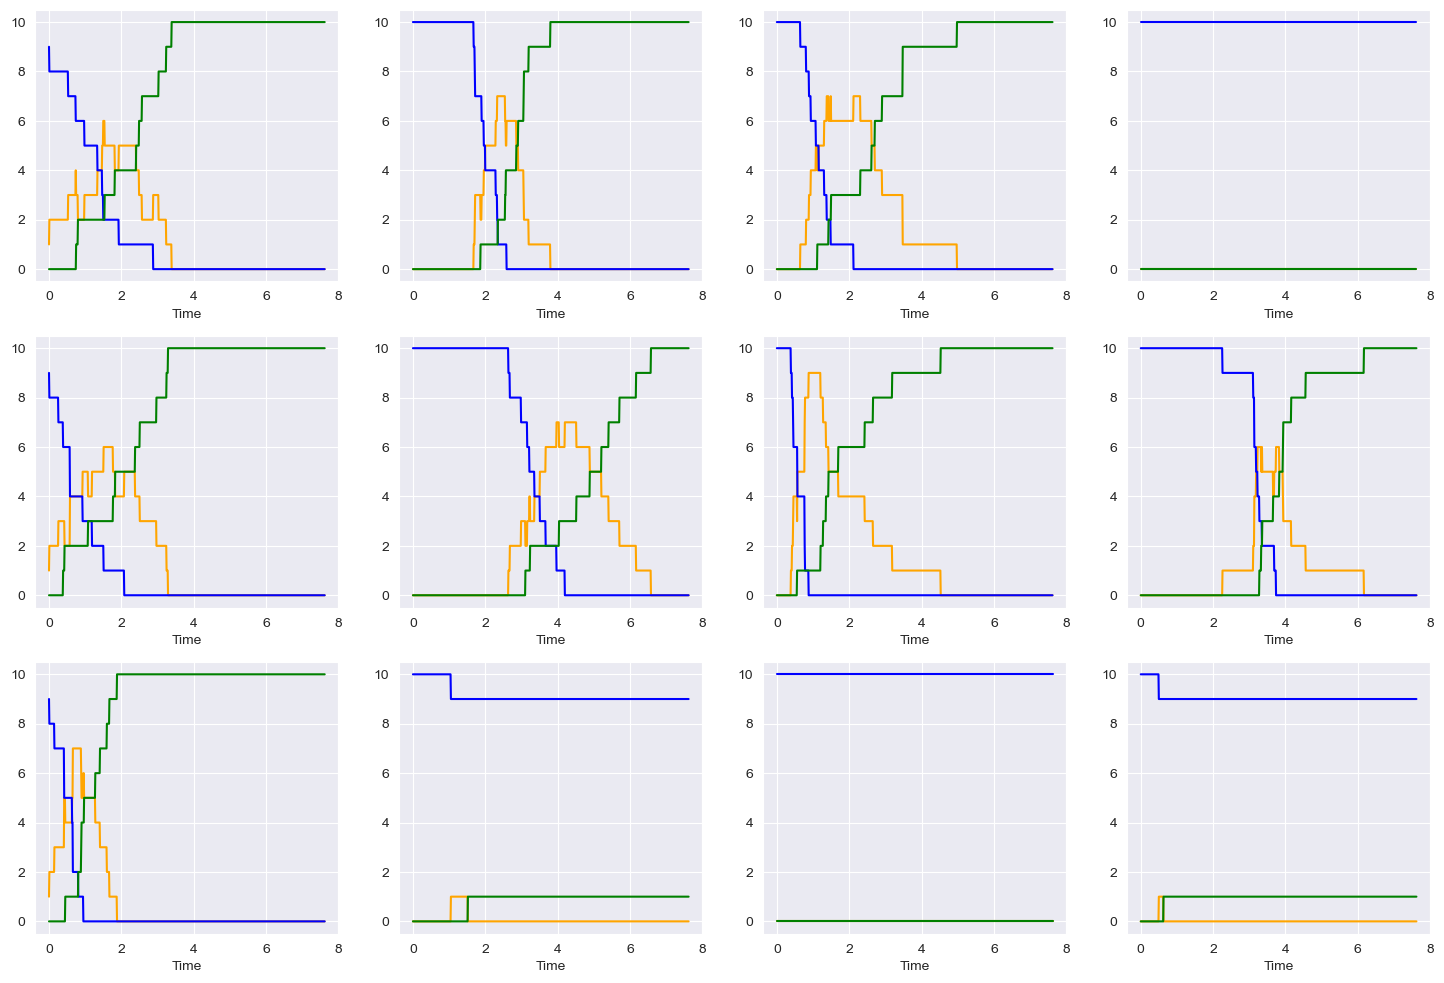

In [76]:
if Typ == "meta":
    fig, ax0 = plt.subplots(figsize = (18,12),nrows=3, ncols=4)
    times = np.arange(0,max(output_dictionary["T"]),0.01)
    for i in range(round(len(output_dictionary["Runs"])/2)):
        for j in range(0,4):
            ax0[i,j].plot(times,np.array(output_dictionary["Runs"][i][:,j])[0:len(times),1], color = "orange", alpha = 1)
            ax0[i,j].plot(times,np.array(output_dictionary["Runs"][i][:,j])[0:len(times),0], color = "b", alpha = 1)
            ax0[i,j].plot(times,np.array(output_dictionary["Runs"][i][:,j])[0:len(times),2], color = "g", alpha = 1)
            ax0[i,j].set_xlabel("Time")
    fig.show()